In [66]:
#loading dataset
import pandas as pd
df=pd.read_csv("wine.csv")
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [67]:
# Get information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None


In [68]:
import numpy as np
df = df.replace(np.inf, np.nan)  # Convert inf values to NaN
df.dropna(inplace=True)  # Drop rows with missing values

In [69]:
# Check for missing values
print(df.isnull().sum())

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64


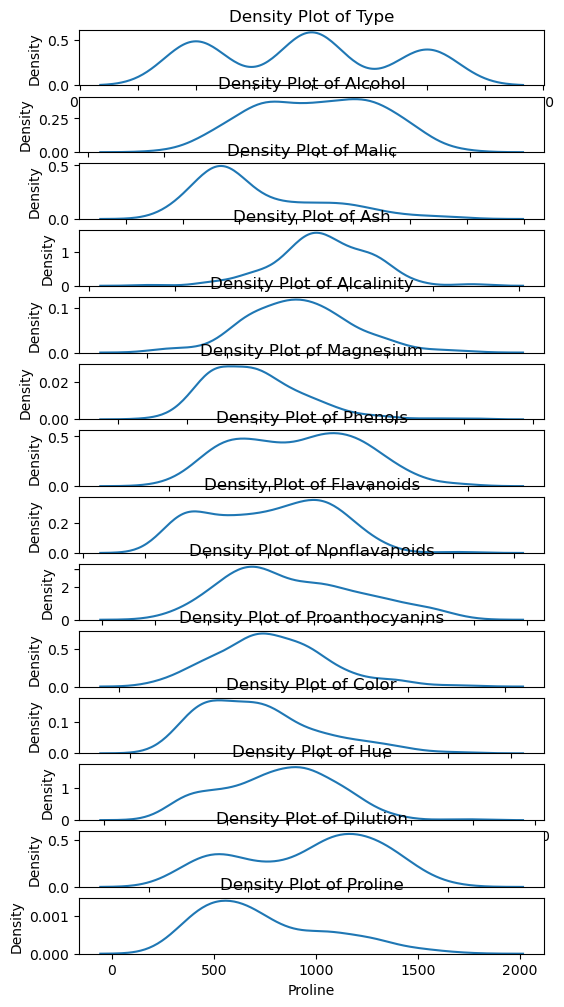

In [70]:
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na option is deprecated")
import seaborn as sns
import matplotlib.pyplot as plt

# Get the list of numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(numerical_cols), figsize=(6, 12))


# Iterate over each numerical column and create a density plot
for i, col in enumerate(numerical_cols):
    sns.kdeplot(df[col], ax=axes[i])
    axes[i].set_title(f'Density Plot of {col}')

plt.show()

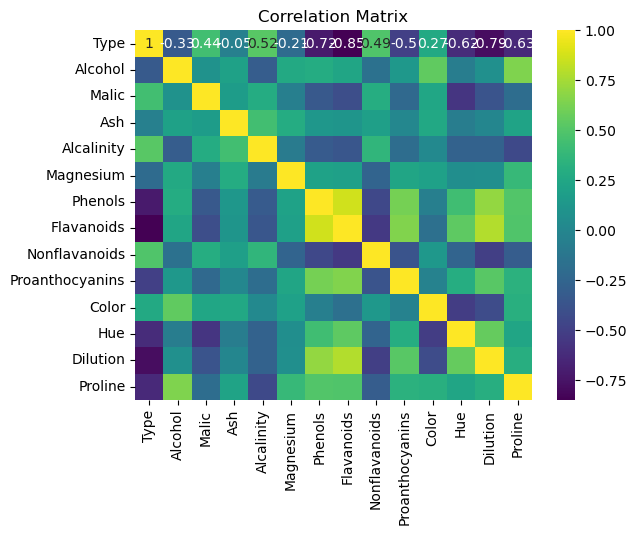

In [71]:
#finding correlation
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

In [72]:
'''A value of 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation''' 


'A value of 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation'

In [73]:
#Standarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

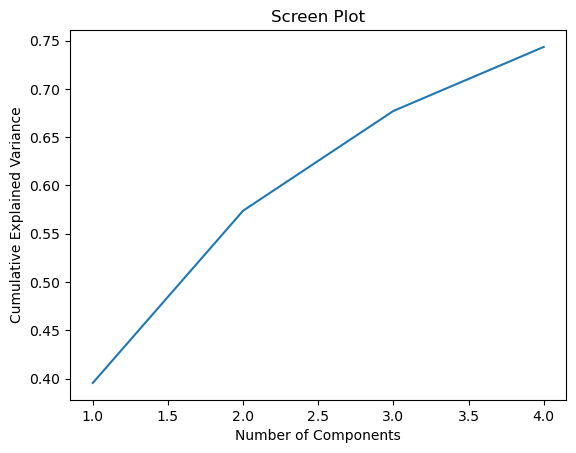

In [74]:
import matplotlib.pyplot as plt

# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create a scree plot
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum())

plt.title('Screen Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [75]:
n_components = 4  # Choosing  the optimal number of components where we get curve(elbow)
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_scaled)

In [76]:
#Kmeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels_original = kmeans.fit_predict(df_scaled)

In [77]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
cluster_labels_pca = kmeans_pca.fit_predict(df_pca)

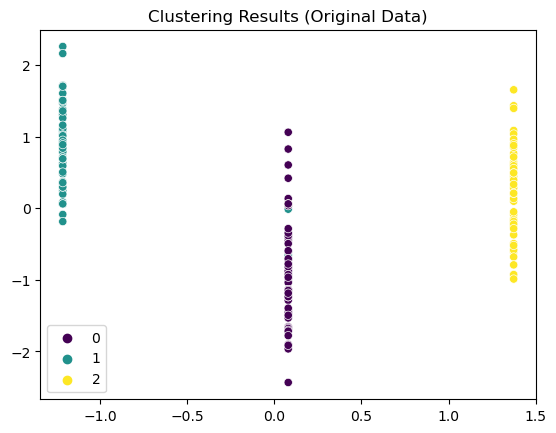

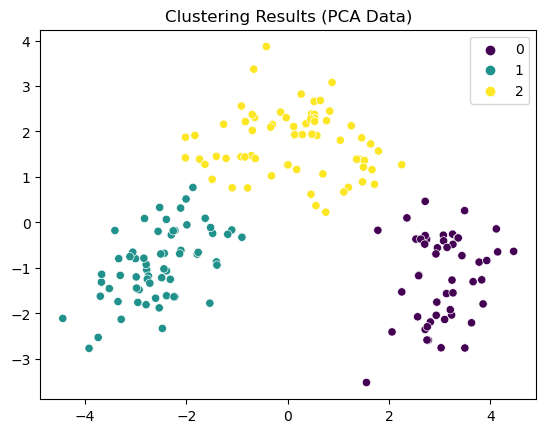

Silhouette Score (Original Data): 0.30773604383565206
Silhouette Score (PCA Data): 0.43678812275959533


In [78]:
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize clustering results from original data
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], data=df, hue=cluster_labels_original, palette='viridis')
plt.title('Clustering Results (Original Data)')
plt.show()

# Visualize clustering results from PCA data
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=cluster_labels_pca, palette='viridis')
plt.title('Clustering Results (PCA Data)')
plt.show()

# Compare silhouette scores
silhouette_original = silhouette_score(df_scaled, cluster_labels_original)
silhouette_pca = silhouette_score(df_pca, cluster_labels_pca)

print("Silhouette Score (Original Data):", silhouette_original)
print("Silhouette Score (PCA Data):", silhouette_pca)